In [1]:
# Imports for pandas, matplotlib, regex, yaml and OS stuff for the directory path

In [2]:
import pandas as pd
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import re
import os
import yaml
# libraries
import numpy as np
from os.path import expanduser
import random


In [3]:
#Reading and splitting the Data. I'm assuming correct .yml files
#Splitting into 3 different Lists, one for each data

In [4]:
directory = expanduser("~/clean")
gen = expanduser("~/clean")
pattern = re.compile("^result_A\d+_B\d+_\d+\.yaml")
row_list = {"deviation": [], "input_force": [], "velocity": [] , "score" : []}
user_first = ['B3','B5', 'B7', 'B8','B9','B10','B12','B13','B15','B16','B19', 'B20','B21']
vel_first = ["B3","B19","B22","B5","B6","B10","B12"]
user = ["B3", "B4", "B19", "B20","B21","B7","B8","B9","B5","B16","B15","B12","B10"]
user2 = ["B12","B10", "B16","B5", "B6", "B22","B19", "B3", "B4"]
einschätzung = {"A1" : [4,4,5,5,3,3,5,4,4,5,4,3,3,2,3,5,3,3,3,5,4,4],
"A2": [5,3,5,3,4,4,4,5,3,5,4,5,2,2,4,4,4,3,3,4,5,4],
"A3":[4,4,5,5,4,4,3,5,5,5,5,4,4,3,1,4,5,4,3,3,4,4],
"A4":[4,4,5,5,5,4,4,5,3,5,5,4,3,3,4,4,4,3,3,3,4,4],
"A6":[4,4,5,5,5,4,5,5,4,5,5,4,3,4,5,4,5,4,3,3,5,4],
'A7':[3,2,3,5,4,2,4,5,2,3,4,3,3,3,2,4,5,4,3,3,5,3],
"A8":[3,3,2,2,3,3,4,3,2,4,5,2,2,3,2,4,4,3,1,3,3,4]}
print(0)
for file_name in os.listdir(directory):
    match = re.match(r"result_A(\d+)_B(\d+)_(\d+)\.yml", file_name)
    if match:
        with open(directory + "/" + file_name, "r") as file:
            results = yaml.safe_load(file)
            row = {"deviation": {}, "input_force": {}, "velocity": {}, "score" : {}}
            for r in ["deviation", "velocity", "input_force"]:
                for s in results[r]:
                    row[r][s + "_AVERAGE"] = results[r][s][1]
                    row[r][s + "_STD"] = results[r][s][2]
                    row[r][s + "_TOTAL"] = results[r][s][0] 
            for s in results["score"]:
                row["score"][s] = 5 * results["score"][s]
        
            for t in ["deviation", "input_force", "velocity", "score"]:
                print(results["user_id"].split("B")[1])
                nummer = int(results["user_id"].split("B")[1]) - 1
                row[t]["self"] = einschätzung[results["task_id"]][nummer]
                print(row[t]["self"])
                for r in ["task_id", "try", "user_id", "training_time"]:
                    row[t][r] = results[r]
                
                row[t]["difficulty_AVERAGE"] = results["difficulty"][1]
                row[t][ "difficulty_STD"] = results["difficulty"][2]
                row[t][ "difficulty_TOTAL"] = results["difficulty"][0]
                if (row[t]["task_id"] == "A3"):
                    if (row[t]["user_id"] in user):
                        row[t]["task_id"] == "A2"
                if (row[t]["task_id"] == "A2"):
                    if (row[t]["user_id"] in user):
                        row[t]["task_id"] == "A3"
                if (row[t]["task_id"] == "A4"):
                    if (row[t]["user_id"] in user):
                        row[t]["task_id"] == "A6"
                if (row[t]["task_id"] == "A6"):
                    if (row[t]["user_id"] in user):
                        row[t]["task_id"] == "A4"
                if ((row[t]["task_id"] == "A2") or ((row[t]["task_id"] == "A3"))):
                    
                    print(row[t]["user_id"] in user_first)
                    if (row[t]["user_id"] in user_first):
                        row[t]["user_cont_first"] = True 
                    else:
                        row[t]["user_cont_first"] = False
                if ((row[t]["task_id"] == "A4") or ((row[t]["task_id"] == "A6"))):
                    
                    print(row[t]["user_id"] in vel_first)
                    if (row[t]["user_id"] in vel_first):
                        row[t]["vel_cont_first"] = "velocity adapt first" 
                    else:
                        row[t]["vel_cont_first"] = "base first" 
            for t in ["deviation", "input_force", "velocity", "score"]:
                row_list[t].append(row[t])
print(0)

0
17
4
False
17
4
False
17
4
False
17
4
False
8
4
8
4
8
4
8
4
20
3
20
3
20
3
20
3
7
4
7
4
7
4
7
4
16
4
16
4
16
4
16
4
12
4
True
12
4
True
12
4
True
12
4
True
19
3
19
3
19
3
19
3
2
4
False
2
4
False
2
4
False
2
4
False
11
4
False
11
4
False
11
4
False
11
4
False
22
3
22
3
22
3
22
3
14
3
14
3
14
3
14
3
20
3
20
3
20
3
20
3
7
4
7
4
7
4
7
4
16
4
16
4
16
4
16
4
22
3
22
3
22
3
22
3
15
4
False
15
4
False
15
4
False
15
4
False
14
3
14
3
14
3
14
3
1
5
False
1
5
False
1
5
False
1
5
False
1
4
False
1
4
False
1
4
False
1
4
False
4
3
False
4
3
False
4
3
False
4
3
False
9
2
9
2
9
2
9
2
10
4
10
4
10
4
10
4
14
3
False
14
3
False
14
3
False
14
3
False
11
5
False
11
5
False
11
5
False
11
5
False
22
4
22
4
22
4
22
4
12
2
12
2
12
2
12
2
17
4
False
17
4
False
17
4
False
17
4
False
19
3
19
3
19
3
19
3
9
2
9
2
9
2
9
2
4
2
4
2
4
2
4
2
10
4
10
4
10
4
10
4
15
4
True
15
4
True
15
4
True
15
4
True
16
4
True
16
4
True
16
4
True
16
4
True
20
5
20
5
20
5
20
5
13
3
False
13
3
False
13
3
False
13
3
False
19
3
19
3
19
3

In [5]:
# Create a pandas Dataframe frame for each
# .head() shows the first 5 entrys of a Dataframe

In [6]:
print(0)
df_deviation = pd.DataFrame(row_list["deviation"])
df_velocity = pd.DataFrame(row_list["velocity"])
df_input_force = pd.DataFrame(row_list["input_force"])
df_score = pd.DataFrame(row_list["score"])
df_score.head()


0


,END,END_fsd_0_dd_0__fdd_0,LINE1,LINE1_fsd_0_dd_0__fdd_0,LINE1_fsd_0_dd_0__fdd_3,LINE1_fsd_0_dd_0__fdd_6,LINE1_fsd_0_dd_3__fdd_0,LINE1_fsd_1_dd_0__fdd_3,LINE1_fsd_1_dd_0__fdd_6,LINE1_fsd_3_dd_0__fdd_3,...,TURNING1_fsd_6_dd_0__fdd_9,LINE1_fsd_0_dd_2__fdd_9,LINE1_fsd_1_dd_2__fdd_0,TURNING1_fsd_2_dd_2__fdd_8,LINE1_fsd_0_dd_0__fdd_7,TURNING2_fsd_2_dd_0__fdd_0,TURNING2_fsd_2_dd_0__fdd_1,TURNING2_fsd_3_dd_0__fdd_2,END_fsd_0_dd_0__fdd_4,TURNING2_fsd_4_dd_0__fdd_8
0,1.012318,0.994004,179.836806,88.413401,0.156887,0.83961,46.143570,0.052194,0.803155,0.031648,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.166543,0.168128,29.855456,10.154591,NaN,NaN,8.479379,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.143307,3.094065,128.005861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.273115,0.261505,114.511888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.711294,0.702726,32.030883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_velocity.head()

,END_AVERAGE,END_STD,END_TOTAL,END_fsd_0_dd_0__fdd_0_AVERAGE,END_fsd_0_dd_0__fdd_0_STD,END_fsd_0_dd_0__fdd_0_TOTAL,LINE1_AVERAGE,LINE1_STD,LINE1_TOTAL,LINE1_fsd_0_dd_0__fdd_0_AVERAGE,...,TURNING2_fsd_2_dd_0__fdd_1_TOTAL,TURNING2_fsd_3_dd_0__fdd_2_AVERAGE,TURNING2_fsd_3_dd_0__fdd_2_STD,TURNING2_fsd_3_dd_0__fdd_2_TOTAL,END_fsd_0_dd_0__fdd_4_AVERAGE,END_fsd_0_dd_0__fdd_4_STD,END_fsd_0_dd_0__fdd_4_TOTAL,TURNING2_fsd_4_dd_0__fdd_8_AVERAGE,TURNING2_fsd_4_dd_0__fdd_8_STD,TURNING2_fsd_4_dd_0__fdd_8_TOTAL
0,0.440659,0.0,0.440659,0.432971,0.0,0.432971,0.387030,0.130573,44.895489,0.509908,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.162340,0.0,0.162340,0.164148,0.0,0.164148,0.165813,0.090576,17.576137,0.170494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.213596,0.0,0.213596,0.212102,0.0,0.212102,0.213301,0.039557,26.449273,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.232013,0.0,0.232013,0.229385,0.0,0.229385,0.457695,0.186141,19.680874,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.193697,0.0,0.193697,0.191215,0.0,0.191215,0.250647,0.087293,15.038796,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_input_force.head()
df_input_force["user_cont_first"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
138     NaN
139    True
140     NaN
141     NaN
142     NaN
Name: user_cont_first, Length: 143, dtype: object

In [9]:
x = [0.073,0.107,0.138]
y = [1, 1.32, 1.41]
print(np.corrcoef(x, y)[0,1])

0.9592169590946543


Text(0, 0.5, 'Abweichung vom Pfad in m')

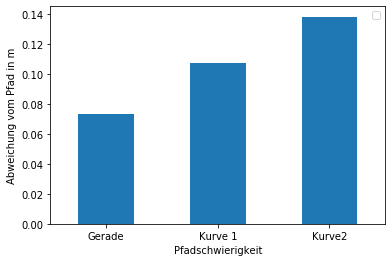

In [10]:
df = pd.DataFrame(x,["Gerade", "Kurve 1", "Kurve2"])
ax = df.plot.bar(rot=0)
ax.legend('')
ax.set_xlabel("Pfadschwierigkeit")
ax.set_ylabel("Abweichung vom Pfad in m")


In [11]:
df_deviation["TURNING1_fsd_0_dd_0__fdd_0_AVERAGE"].tolist()

[nan,
 nan,
 nan,
 nan,
 nan,
 0.16388847479373725,
 nan,
 0.1020927759903481,
 0.11346418206474324,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.08398459683319798,
 nan,
 0.10107814901457715,
 0.10847820007006202,
 0.03083102273331048,
 nan,
 nan,
 0.19998691224313947,
 nan,
 nan,
 nan,
 0.038975260778886286,
 nan,
 nan,
 nan,
 nan,
 0.07898352139953715,
 0.09098428725903311,
 nan,
 nan,
 nan,
 0.18667571446994863,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.21766243523959794,
 nan,
 nan,
 nan,
 0.0790416106645627,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.020900315079271904,
 0.10442158019208798,
 nan,
 nan,
 nan,
 0.038524039385919764,
 nan,
 0.029482456850220842,
 0.035414603115304304,
 nan,
 nan,
 nan,
 nan,
 0.04024491710057822,
 nan,
 0.17199980551482155,
 nan,
 nan,
 0.10572782668040533,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.037664364267057694,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.09827605616465004,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.037254270963597784,
 

In [74]:
for x in range(0,10):
    print(df_deviation["fsd_"+str(x)+"_AVERAGE"].std()/ 0.04801670496391923)

1.2000123109489833
1.2862615752953002
1.1957902194169243
1.1474383672322572
1.0
0.9569472873231264
1.2139744388127465
0.0
0.0
0.0


In [49]:
df_deviation["LINE1_fsd_0_dd_7__fdd_0_AVERAGE"].mean()

0.13665915722371233

In [45]:
df_deviation["LINE1_fsd_0_dd_0__fdd_0_AVERAGE"].mean()

0.09783808573342793

In [46]:
df_deviation["LINE1_fsd_0_dd_1__fdd_0_AVERAGE"].mean()

0.10796039681470965

In [47]:
df_deviation["LINE1_fsd_0_dd_3__fdd_0_AVERAGE"].mean()

0.09620997746994339

In [48]:
df_deviation["LINE1_fsd_0_dd_2__fdd_0_AVERAGE"].mean()

0.04995750478647315

In [14]:
# capsize adds the horizontal bar to the errorbar
# set_ylabel() adds the text on the left
# legend(loc='upper left') fixes the legend to to upperleft corner
# rot=0 turns the x labels

In [ ]:
print()

In [43]:
x = df_deviation["fsd_6_AVERAGE"].mean()
x1 = df_deviation["fsd_6_AVERAGE"].mean()
x2 = df_deviation["fsd_6_AVERAGE"].mean()
x3

0.02077216460749189

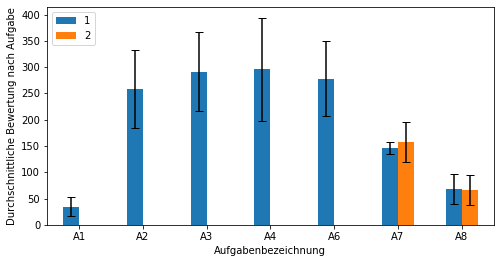

In [16]:
df_plot = df_score.groupby(["task_id","try"]).mean()
df_std = df_score.groupby(["task_id","try"]).std()
ax = {}
for t in [ "general"]:
    ax[t] = df_plot.unstack().plot.bar(y= t, yerr=df_std.unstack()[t], capsize=4, rot=0, figsize=(8,4))
    ax[t].set_ylabel("Durchschnittliche Bewertung nach Aufgabe")
    ax[t].set_xlabel("Aufgabenbezeichnung")
    ax[t].legend(loc='upper left')

In [17]:
df_score.groupby(["task_id","try"])["general"].mean()

task_id  try
A1       1       34.509328
A2       1      257.858010
A3       1      291.434058
A4       1      295.506933
A6       1      277.720288
A7       1      146.002727
         2      157.316394
A8       1       68.210558
         2       66.825347
Name: general, dtype: float64

task_id  try
A1       1      0.074347
A2       1      0.086061
A3       1      0.111046
A4       1      0.124004
A6       1      0.109576
A7       1      0.066242
         2      0.081724
A8       1      0.114062
         2      0.113650
Name: general_AVERAGE, dtype: float64
In [41]:

df_score.groupby(["task_id","try"])["general"].mean()
Out[41]:
task_id  try
A1       1       9.659844
A2       1      40.587263
A3       1      54.971681
A4       1      59.172448
A6       1      48.390849
A7       1      18.176277
         2      22.486374
A8       1      17.301100
         2      17.062780
Name: general, dtype: float64

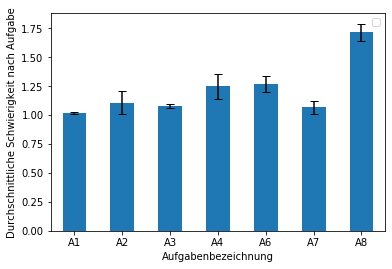

In [18]:
df_plot = df_score.groupby("task_id").mean()
df_std = df_score.groupby("task_id").std()
ax = {}
t = "difficulty_AVERAGE"
ax[t] = df_plot.plot.bar(y= t, yerr=df_std[t], capsize=4, rot=0)
ax[t].set_ylabel("Durchschnittliche Schwierigkeit nach Aufgabe")
ax[t].set_xlabel("Aufgabenbezeichnung")
ax[t].legend('')


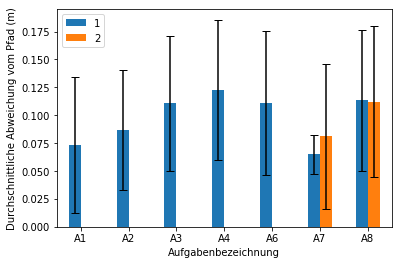

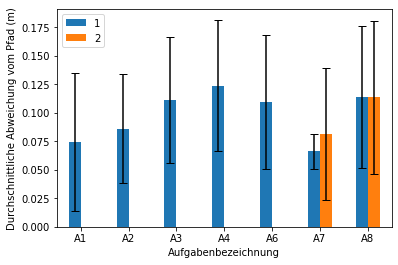

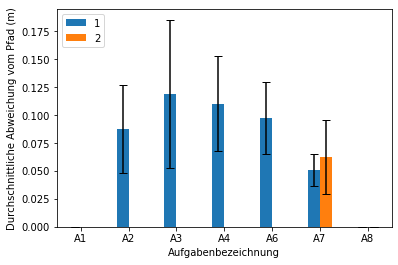

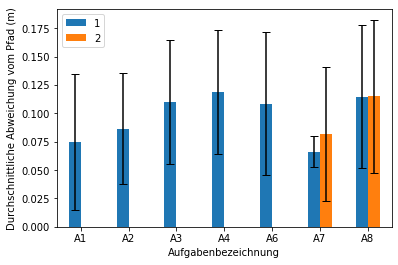

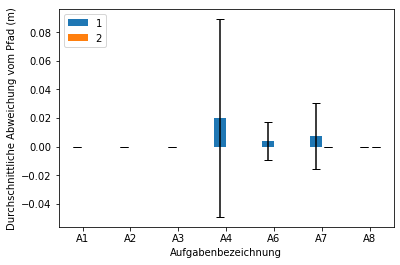

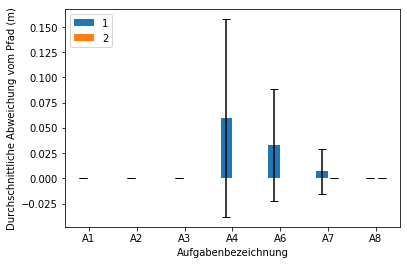

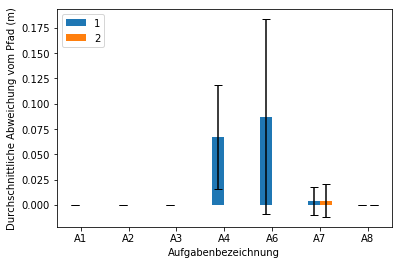

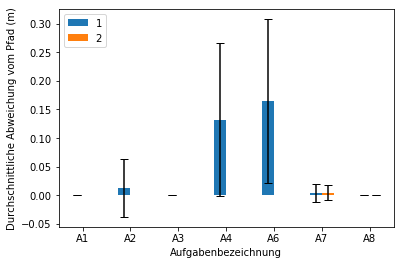

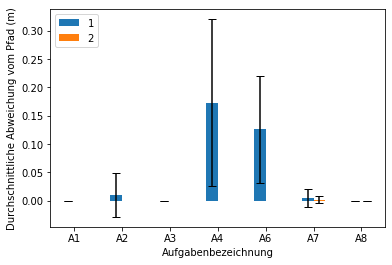

In [50]:
df_plot = df_deviation.groupby(["task_id","try"]).mean()
df_std = df_deviation.groupby(["task_id","try"]).std()
ax = {}
for t in ["LINE1", "general", "TURNING1", "fdd_0","fdd_1" , "fdd_2","fdd_3","fdd_4" , "fdd_5"]:
    ax[t] = df_plot.unstack().plot.bar(y= t + "_AVERAGE", yerr=df_std.unstack()[t + "_AVERAGE"], capsize=4, rot=0)
    ax[t].set_ylabel("Durchschnittliche Abweichung vom Pfad (m)")
    ax[t].set_xlabel("Aufgabenbezeichnung")
    ax[t].legend(loc='upper left')

In [20]:
df_score.groupby(["task_id"]).mean()["self"]
#df_score.groupby(["task_id"]).std()
#df_plot.unstack().plot.bar(y="self", yerr=df_std.unstack()["self"], capsize=4, rot=0)

task_id
A1    3.857143
A2    3.866667
A3    3.750000
A4    3.833333
A6    4.181818
A7    3.410256
A8    3.000000
Name: self, dtype: float64

In [21]:
df_score.groupby(["task_id"])['general'].corr(df_deviation['general_AVERAGE'], method="pearson")

task_id
A1    0.977084
A2    0.845511
A3    0.954493
A4    0.923493
A6    0.938929
A7    0.961692
A8    0.952040
Name: general, dtype: float64

In [22]:
value = [0.086061, 0.111046, 0.124004, 0.109576]
diff = [53.370855819885705, 58.134957199676684, 59.38756881049176, 55.28487528876069]
print(np.corrcoef(value, diff)[0,1])

0.9136569178789787


In [23]:
value = [3.8666666666666667,
 3.75,
 3.8333333333333335,
 4.181818181818182]
diff = [53.370855819885705, 58.134957199676684, 59.38756881049176, 55.28487528876069]
print(np.corrcoef(value, diff)[0,1])

-0.4382947747834177


In [24]:
value = [3.857142857142857, 3.0, 3.0]
diff = [6.883326855325617, 13.940419871148285, 13.580826727285615]
print(np.corrcoef(value, diff)[0,1])

-0.9989763503628455


In [25]:
value = [0.086061, 0.111046, 0.124004, 0.109576]
diff = [53.370855819885705, 58.134957199676684, 59.38756881049176, 55.28487528876069]
print(np.corrcoef(value, diff)[0,1])

0.9136569178789787


Korrelation zwischen Selbsteinschätzung und Bewertungsfunktion

0.032942855784440984


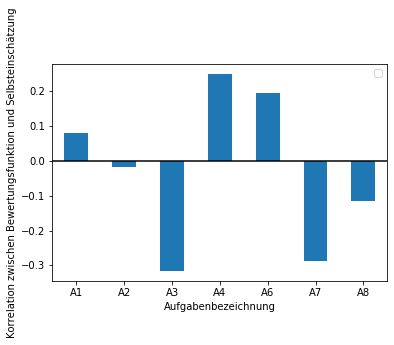

In [26]:
value = [0.080293,-0.017404,-0.317050,0.250883,0.193864,-0.287667,-0.115689]
diff = [1.011326, 1.097661, 1.077394, 1.219423, 1.211798, 1.066363, 1.724371]
print(np.corrcoef(value, diff)[0,1])
df = pd.DataFrame(value,["A1","A2","A3","A4","A6","A7","A8"])
ax = df.plot.bar( capsize=4, rot=0)
ax.set_ylabel("Korrelation zwischen Bewertungsfunktion und Selbsteinschätzung")
ax.set_xlabel("Aufgabenbezeichnung")
ax.axhline(y=0, color="black")
ax.legend('')

0.15710306055426346


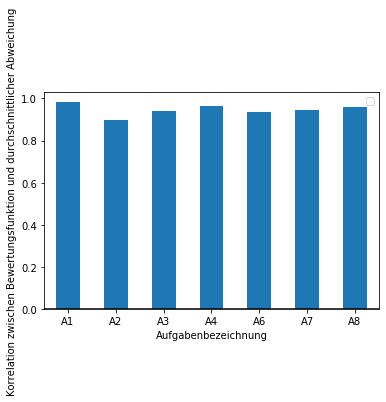

In [27]:
value = [0.981966,0.896184,0.938850,0.964398,0.936568,0.943916,0.958389]
diff = [1.011326, 1.097661, 1.077394, 1.219423, 1.211798, 1.066363, 1.724371]
print(np.corrcoef(value, diff)[0,1])
df = pd.DataFrame(value,["A1","A2","A3","A4","A6","A7","A8"])
ax = df.plot.bar( capsize=4, rot=0)
ax.set_ylabel("Korrelation zwischen Bewertungsfunktion und durchschnittlicher Abweichung")
ax.set_xlabel("Aufgabenbezeichnung")
ax.axhline(y=0, color="black")
ax.legend('')

In [28]:
value = [0.086061, 0.111046, 0.124004, 0.109576]
diff = [53.370855819885705, 58.134957199676684, 59.38756881049176, 55.28487528876069]
print(np.corrcoef(value, diff)[0,1])

0.9136569178789787


In [29]:
value = [0.086061, 0.111046, 0.124004, 0.109576]
diff = [53.370855819885705, 58.134957199676684, 59.38756881049176, 55.28487528876069]
print(np.corrcoef(value, diff)[0,1])

0.9136569178789787


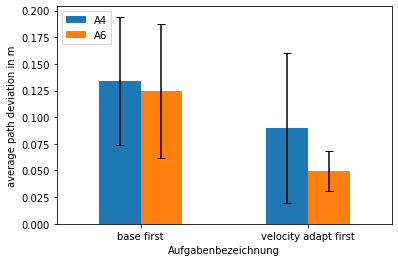

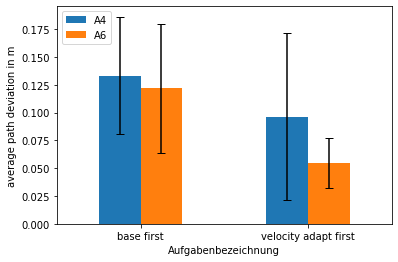

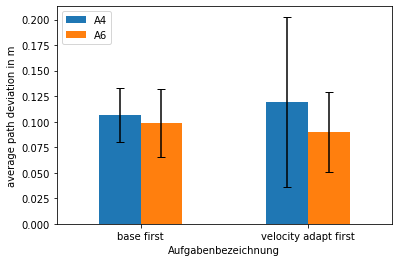

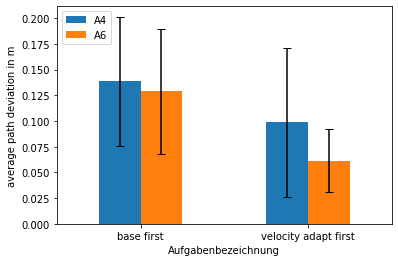

In [30]:
df_plot = df_deviation.groupby(["vel_cont_first", "task_id"]).mean()
df_std = df_deviation.groupby(["vel_cont_first","task_id"]).std()
ax = {}
for t in ["LINE1", "general", "TURNING1", "dd_0"]:
    ax[t] = df_plot.unstack().plot.bar(y= t + "_AVERAGE", yerr=df_std.unstack()[t + "_AVERAGE"], capsize=4, rot=0)
    ax[t].set_ylabel("average path deviation in m")
    ax[t].set_xlabel("Aufgabenbezeichnung")
    ax[t].legend(loc='upper left')

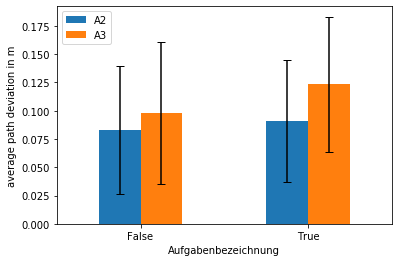

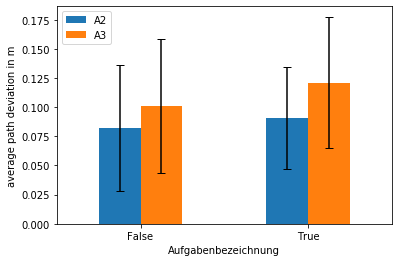

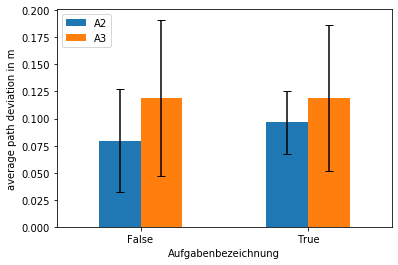

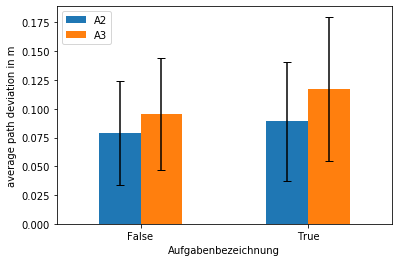

In [31]:
df_plot = df_deviation.groupby(["user_cont_first", "task_id"]).mean()
df_std = df_deviation.groupby(["user_cont_first","task_id"]).std()
ax = {}
for t in ["LINE1", "general", "TURNING1", "dd_0"]:
    ax[t] = df_plot.unstack().plot.bar(y= t + "_AVERAGE", yerr=df_std.unstack()[t + "_AVERAGE"], capsize=4, rot=0)
    ax[t].set_ylabel("average path deviation in m")
    ax[t].set_xlabel("Aufgabenbezeichnung")
    ax[t].legend(loc='upper left')